# 피파인디언 데이터 활용

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#1.과거의 임신 횟수
#2.포도당 부하 검사 2시간 후 공복 혈당 농도
#3.확장기 혈압
#4.삼두근 피부 주름 두께
#5.혈청 인슐린
#6.BMI (체질량 지수)
#7.당뇨병 가족력
#8.나이
#class : 1(당뇨), 0(정상)

df = pd.read_csv('./dataset/pima-indians-diabetes.csv',
                names = ["pregnant", "plasma", "pressure", "thickness", 
                "insulin", "BMI", "pedigree", "age", "class"])

In [3]:
df

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df[['plasma','insulin','class']]

,plasma,insulin,class
0,148,0,1
1,85,0,0
2,183,0,1
3,89,94,0
4,137,168,1
...,...,...,...
763,101,180,0
764,122,0,0
765,121,112,0
766,126,0,1


In [8]:
df.loc[5:12,['plasma','class','insulin','BMI']]

,plasma,class,insulin,BMI
5,116,0,0,25.6
6,78,1,88,31.0
7,115,0,0,35.3
8,197,1,543,30.5
9,125,1,0,0.0
10,110,0,0,37.6
11,168,1,0,38.0
12,139,0,0,27.1


## 데이터간 상관관계 그래프 표현

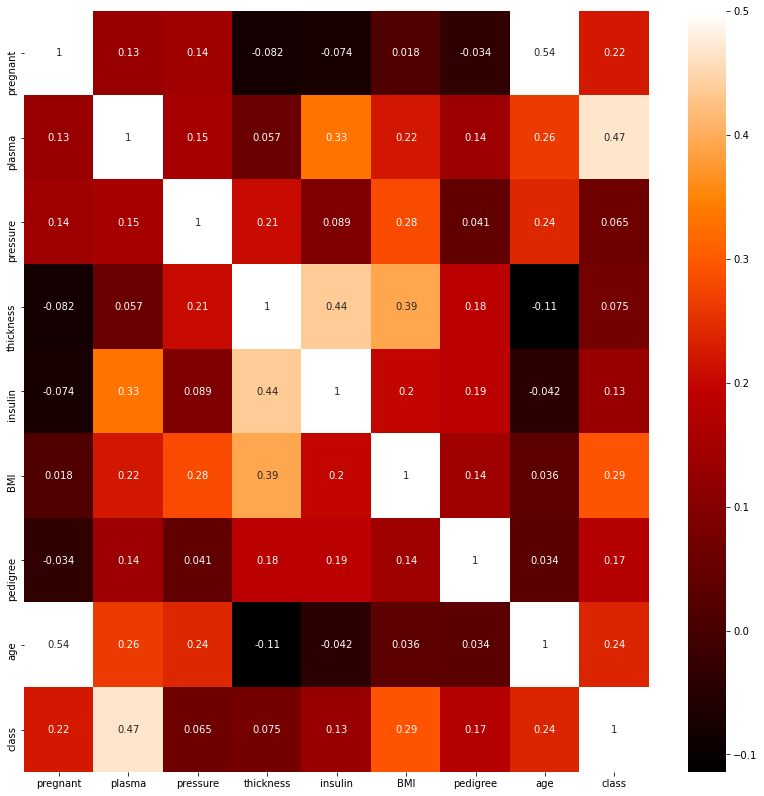

In [10]:
import matplotlib.pyplot as plt

colormap = plt.cm.gist_heat 
plt.figure(figsize=(14,14))

sns.heatmap(df.corr(),linewidths=0,vmax=0.5,cmap=colormap,linecolor='white',annot=True)
plt.show()

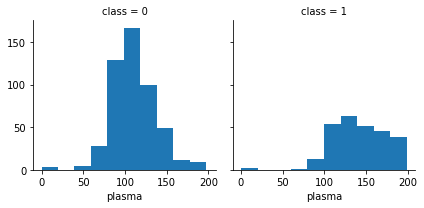

In [11]:
grid = sns.FacetGrid(df,col='class')
grid.map(plt.hist,'plasma',bins=10)
plt.show()

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#라이브러리
import numpy as np
import tensorflow as tf

In [13]:
np.random.seed(3)
tf.random.set_seed(3)

In [14]:
dataset = np.loadtxt('./dataset/pima-indians-diabetes.csv',delimiter=',')
X = dataset[:,0:8] # 데이터 칼럼값 , attribute
Y = dataset[:,8] # 데이터 정답값 , class

In [15]:
model = Sequential() #분류모델
model.add(Dense(12, input_dim=8, activation='relu')) # 12로 결정하는 이유는? 경험상 12층으로 ,,,
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
# 지금총 3개의 층이 싸였다 relu model, sigmoid model이 있고, 여러개 입출력할때에 히든층에서 옮길때

In [16]:
#모델을 컴파일
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [18]:
model.fit(X,Y,epochs=200,batch_size=10)

Train on 768 samples
Epoch 1/200
768/768 [==============================] - 0s 314us/sample - loss: 0.5659 - accuracy: 0.7305
Epoch 2/200
768/768 [==============================] - 0s 106us/sample - loss: 0.5598 - accuracy: 0.7201
Epoch 3/200
768/768 [==============================] - 0s 103us/sample - loss: 0.5613 - accuracy: 0.7292
Epoch 4/200
768/768 [==============================] - 0s 105us/sample - loss: 0.5584 - accuracy: 0.7292
Epoch 5/200
768/768 [==============================] - 0s 107us/sample - loss: 0.5517 - accuracy: 0.7344
Epoch 6/200
768/768 [==============================] - 0s 101us/sample - loss: 0.5688 - accuracy: 0.7096
Epoch 7/200
768/768 [==============================] - 0s 92us/sample - loss: 0.5580 - accuracy: 0.7161
Epoch 8/200
768/768 [==============================] - 0s 97us/sample - loss: 0.5567 - accuracy: 0.7292
Epoch 9/200
768/768 [==============================] - 0s 101us/sample - loss: 0.5564 - accuracy: 0.7214
Epoch 10/200
768/768 [==============

In [19]:
# 결과출력
print('적중률 : %0.4f' % (model.evaluate(X,Y)[1]))

768/768 [==============================] - 0s 117us/sample - loss: 0.5553 - accuracy: 0.7188
적중률 : 0.7188
